In [1]:
###importing the required libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
test_df=pd.read_csv("test.csv")

In [3]:
test_df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


In [4]:
test_df.shape

(12086, 21)

In [5]:
##checking the null values

test_df.isnull().sum()

tracking_id                         0
datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64

In [6]:
##checking the data types of the features in a given data set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tracking_id                    12086 non-null  object 
 1   datetime                       12086 non-null  object 
 2   wind_speed(m/s)                11960 non-null  float64
 3   atmospheric_temperature(°C)    10659 non-null  float64
 4   shaft_temperature(°C)          12085 non-null  float64
 5   blades_angle(°)                11980 non-null  float64
 6   gearbox_temperature(°C)        12085 non-null  float64
 7   engine_temperature(°C)         12081 non-null  float64
 8   motor_torque(N-m)              12075 non-null  float64
 9   generator_temperature(°C)      12081 non-null  float64
 10  atmospheric_pressure(Pascal)   10935 non-null  float64
 11  area_temperature(°C)           12085 non-null  float64
 12  windmill_body_temperature(°C)  11160 non-null 

In [7]:
test_df.describe()


,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m)
count,11960.000000,10659.000000,12085.000000,11980.000000,12085.000000,12081.000000,12075.000000,12081.000000,1.093500e+04,12085.000000,11160.000000,9926.000000,12086.000000,11805.000000,9972.000000,12086.000000,11831.000000
mean,69.381862,0.687445,39.936571,-9.218509,40.318639,42.604738,1717.343991,65.237894,5.428332e+04,32.796168,20.906469,308.376140,1581.289398,26.566581,2.201328,0.397527,25.963743
std,76.119487,44.051104,27.114499,47.574365,42.481822,6.215124,829.809203,19.868135,1.872562e+05,7.671919,53.291337,133.923293,483.125121,32.103827,11.513251,0.061661,7.716063
min,-525.530600,-99.000000,-99.000000,-99.000000,-185.860883,-5.000000,500.000000,30.000000,-1.207259e+06,-30.000000,-99.000000,0.000000,-1654.449587,-182.169613,-99.000000,0.200009,-21.215639
25%,21.809823,8.118199,41.635406,-1.191777,40.460379,41.925716,874.238660,41.283334,1.679650e+04,27.406656,40.366937,238.782318,1272.310773,13.760163,2.520990,0.346909,24.452970
50%,93.338083,16.177184,43.707769,-0.497108,43.219752,43.553196,2032.285162,70.797759,1.820142e+04,32.658467,42.788389,272.047526,1680.225602,33.090562,3.434327,0.399637,25.950314
75%,95.251808,23.855116,45.756032,6.232264,45.840152,45.228475,2480.423058,79.432294,1.183212e+05,38.302814,44.506596,408.668722,1837.302026,41.976934,4.342784,0.450488,27.490102
max,525.434211,80.442232,183.299983,170.047823,563.000000,49.858945,2997.013769,99.571599,1.127571e+06,53.927698,191.979747,570.857751,4106.196001,213.260076,17.847936,0.499985,77.604969


In [8]:
test_df["wind_speed(m/s)"]=test_df["wind_speed(m/s)"].fillna(test_df["wind_speed(m/s)"].mean())
test_df["atmospheric_temperature(°C)"]=test_df["atmospheric_temperature(°C)"].fillna(test_df["atmospheric_temperature(°C)"].mean()) 
test_df["shaft_temperature(°C)"]=test_df["shaft_temperature(°C)"].fillna(test_df["shaft_temperature(°C)"].mean())
test_df["blades_angle(°)"]=test_df["blades_angle(°)"].fillna(test_df["blades_angle(°)"].mean())
test_df["gearbox_temperature(°C)"]=test_df["gearbox_temperature(°C)"].fillna(test_df["gearbox_temperature(°C)"].mean())
test_df["engine_temperature(°C)"]=test_df["engine_temperature(°C)"].fillna(test_df["engine_temperature(°C)"].mean())
test_df["motor_torque(N-m)"]=test_df["motor_torque(N-m)"].fillna(test_df["motor_torque(N-m)"].mean())
test_df["generator_temperature(°C)"]=test_df["generator_temperature(°C)"].fillna(test_df["generator_temperature(°C)"].mean())
test_df["atmospheric_pressure(Pascal)"]=test_df["atmospheric_pressure(Pascal)"].fillna(test_df["atmospheric_pressure(Pascal)"].mean())
test_df["area_temperature(°C)"]=test_df["area_temperature(°C)"].fillna(test_df["area_temperature(°C)"].mean())
test_df["windmill_body_temperature(°C)"]=test_df["windmill_body_temperature(°C)"].fillna(test_df["windmill_body_temperature(°C)"].mean())
test_df["wind_direction(°)"]=test_df["wind_direction(°)"].fillna(test_df["wind_direction(°)"].mean())
test_df["resistance(ohm)"]=test_df["resistance(ohm)"].fillna(test_df["resistance(ohm)"].mean())
test_df["rotor_torque(N-m)"]=test_df["rotor_torque(N-m)"].fillna(test_df["rotor_torque(N-m)"].mean())
test_df["blade_length(m)"]=test_df["blade_length(m)"].fillna(test_df["blade_length(m)"].mean())
test_df["windmill_height(m)"]=test_df["windmill_height(m)"].fillna(test_df["windmill_height(m)"].mean())


In [9]:
##filling caterogrical values
test_df["turbine_status"]=test_df["turbine_status"].fillna(test_df["turbine_status"].mode()[0])
test_df["cloud_level"]=test_df["cloud_level"].fillna(test_df["cloud_level"].mode()[0])

In [10]:
test_df.isnull().sum()


tracking_id                      0
datetime                         0
wind_speed(m/s)                  0
atmospheric_temperature(°C)      0
shaft_temperature(°C)            0
blades_angle(°)                  0
gearbox_temperature(°C)          0
engine_temperature(°C)           0
motor_torque(N-m)                0
generator_temperature(°C)        0
atmospheric_pressure(Pascal)     0
area_temperature(°C)             0
windmill_body_temperature(°C)    0
wind_direction(°)                0
resistance(ohm)                  0
rotor_torque(N-m)                0
turbine_status                   0
cloud_level                      0
blade_length(m)                  0
blade_breadth(m)                 0
windmill_height(m)               0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
test_df["turbine_status"]=le.fit_transform(test_df["turbine_status"])

In [14]:
test_df["cloud_level"]=le.fit_transform(test_df["cloud_level"])

In [15]:
test_df["cloud_level"].value_counts()

1    6057
2    5893
0     136
Name: cloud_level, dtype: int64

In [16]:
test_df["turbine_status"].value_counts()

9     1668
7      859
0      852
10     813
11     811
8      809
3      804
1      796
4      787
12     787
13     786
5      778
2      773
6      763
Name: turbine_status, dtype: int64

In [17]:
corr=test_df.corr()

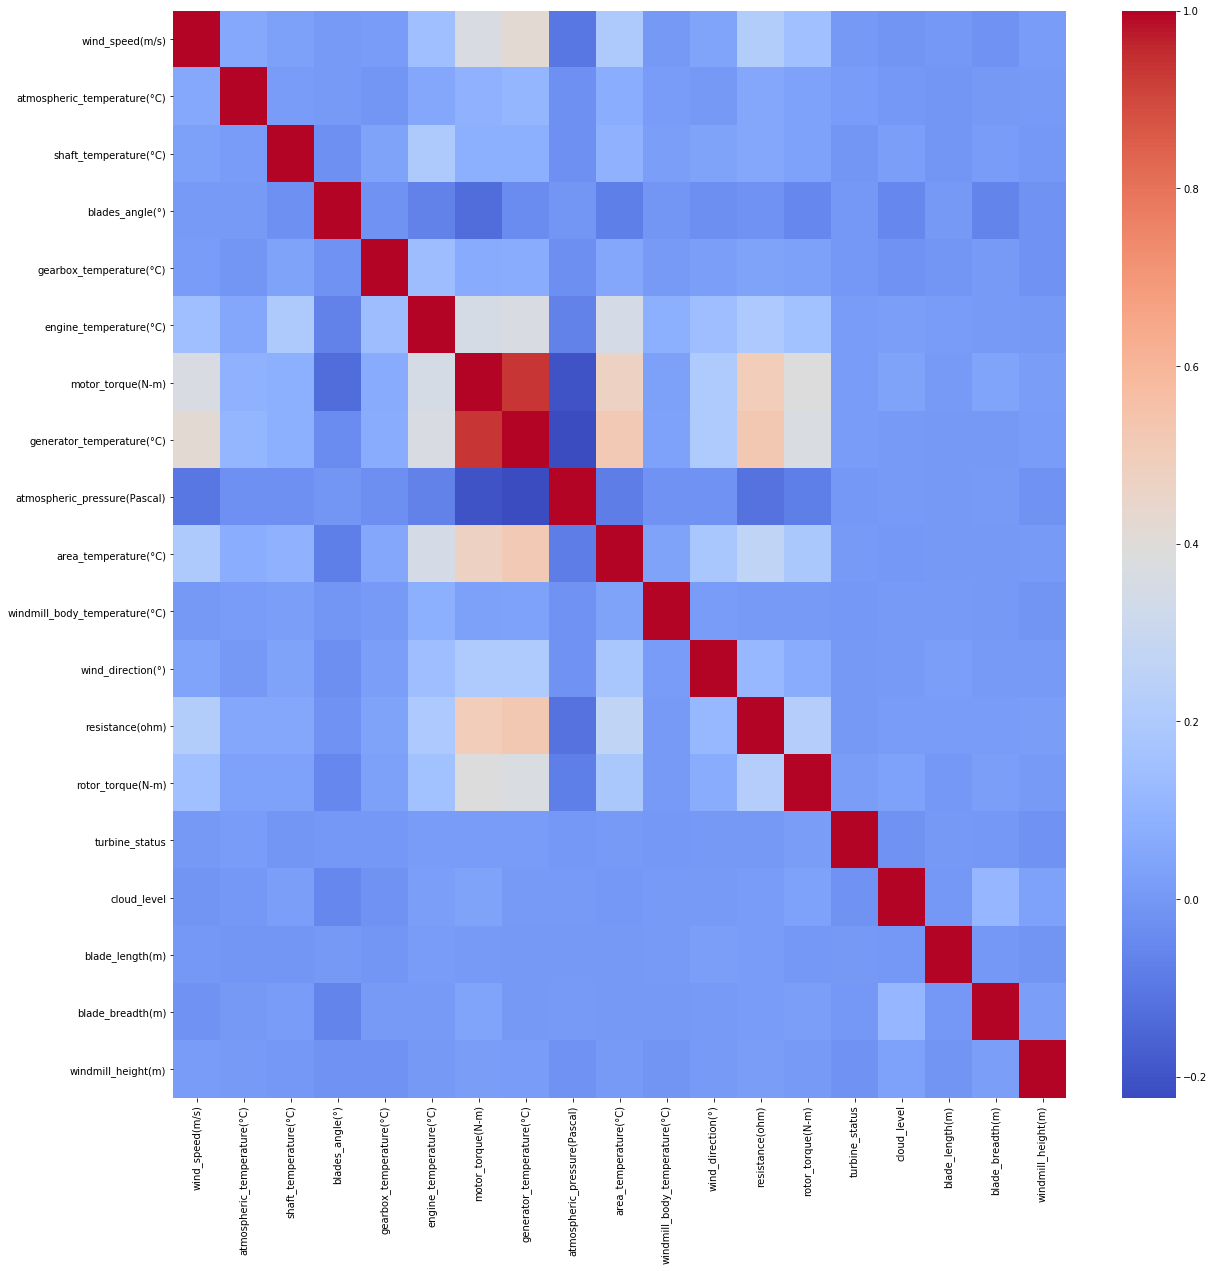

In [18]:
plt.subplots(figsize=(20,20))
sns.heatmap(corr,cmap="coolwarm")

In [19]:
test_df.drop(["tracking_id","datetime","generator_temperature(°C)"],axis=1,inplace=True)

In [20]:
test_df.shape

(12086, 18)

In [21]:
test_df.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,8,2,3.185837,0.403965,25.572431
1,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,54283.324683,29.431813,42.728174,499.595287,1165.111992,-35.050093,0,2,3.016603,0.444755,24.371823
2,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,7,2,2.611941,0.387368,27.654677
3,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,54283.324683,23.886434,13.501595,308.376140,1329.744740,15.245757,10,1,2.866805,0.450478,24.189426
4,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,0,1,3.549672,0.368355,4.885440


In [22]:
test_df.to_csv("changedtestwindspeed.csv")